In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(".\数据集\TrainingData.csv", header=0)
df

,Quote_Id,Quote_Date,Quote_Flag,Field_info1,Field_info2,Field_info3,Field_info4,Coverage_info1,Coverage_info2,Coverage_info3,...,Property_info1,Property_info2,Property_info3,Property_info4,Property_info5,Geographic_info1,Geographic_info2,Geographic_info3,Geographic_info4,Geographic_info5
0,2,14/5/14,0,B,0.9153,935,N,5,2,D,...,N,0,D,1,6,2,13,-1,N,CA
1,3,19/6/13,0,J,0.9691,"1,165",N,5,22,F,...,N,0,D,1,8,14,7,-1,N,TX
2,6,6/2/15,0,B,0.9153,935,N,6,22,D,...,N,0,D,1,11,2,12,-1,N,CA
3,9,15/10/14,0,J,0.8793,"1,113",N,1,22,F,...,N,0,O,0,1,14,6,-1,N,TX
4,10,30/3/15,1,F,1.0101,548,N,13,22,E,...,N,0,R,1,25,4,22,-1,N,NJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62575,104296,28/6/13,0,F,0.9919,564,N,4,25,J,...,N,0,R,1,16,4,17,-1,N,NJ
62576,104297,25/1/14,0,F,0.9838,548,N,13,2,E,...,N,0,R,1,18,4,19,-1,N,NJ
62577,104299,24/1/14,0,B,0.9403,935,N,7,22,E,...,N,0,D,0,24,2,8,-1,N,CA
62578,104300,7/12/14,0,J,0.8870,"1,113",N,15,25,G,...,N,0,J,1,23,14,5,-1,N,TX


In [3]:
train_data=df.sample(frac=0.7)#按0.7比例随机采样
test_data=df[~df.index.isin(train_data.index)]
train_data

,Quote_Id,Quote_Date,Quote_Flag,Field_info1,Field_info2,Field_info3,Field_info4,Coverage_info1,Coverage_info2,Coverage_info3,...,Property_info1,Property_info2,Property_info3,Property_info4,Property_info5,Geographic_info1,Geographic_info2,Geographic_info3,Geographic_info4,Geographic_info5
51266,85507,21/1/13,1,B,0.9219,965,N,25,22,E,...,Y,0,O,0,9,1,15,-1,N,CA
58620,97718,31/3/14,0,B,0.9153,935,N,8,22,D,...,N,0,O,0,24,2,4,-1,Y,CA
2859,4737,25/3/14,1,F,0.9566,548,N,7,25,E,...,N,0,R,1,16,4,22,-1,N,NJ
19411,32343,25/10/13,1,B,0.9403,965,N,6,22,E,...,N,0,O,1,7,2,8,-1,N,CA
7903,13189,20/7/14,0,F,1.0006,548,N,7,22,J,...,Y,0,R,1,16,4,17,-1,N,NJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50017,83405,30/4/14,1,E,0.9392,"1,487",N,3,22,I,...,N,0,R,0,1,12,24,-1,N,IL
11159,18543,29/7/14,0,J,0.8928,"1,113",N,17,22,G,...,N,0,S,0,19,24,14,-1,Y,TX
60031,100034,13/10/14,1,B,0.9153,935,N,2,22,E,...,N,0,O,0,4,2,5,-1,N,CA
11816,19613,14/3/14,1,F,0.9566,548,N,3,22,E,...,N,0,R,1,5,4,17,-1,N,NJ


In [4]:
from autogluon.tabular import TabularDataset, TabularPredictor
train_data = TabularDataset(train_data)
test_data = TabularDataset(test_data)

In [5]:
label="Quote_Flag"
metric='roc_auc'
predictor = TabularPredictor(label, 
                             eval_metric=metric,
                            ).fit(train_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20220528_151821\"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20220528_151821\"
AutoGluon Version:  0.4.1
Python Version:     3.9.12
Operating System:   Windows
Train Data Rows:    43806
Train Data Columns: 29
Label Column: Quote_Flag
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1, 0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    8006.51 MB
	Train Data (Original)  Memory Usage: 36.91 MB (0.5% of available memory)
	Inferring data type of ea

In [6]:
predictor.leaderboard(test_data, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.910633,0.907976,2.204667,0.600166,256.470767,0.011968,0.002029,1.911809,2,True,14
1,CatBoost,0.909430,0.905710,0.076796,0.029924,225.020193,0.076796,0.029924,225.020193,1,True,7
2,LightGBMLarge,0.906547,0.901432,0.345078,0.070811,3.653528,0.345078,0.070811,3.653528,1,True,13
3,XGBoost,0.904546,0.904207,0.245343,0.031915,6.686339,0.245343,0.031915,6.686339,1,True,11
4,LightGBM,0.903512,0.901148,0.217928,0.066821,2.380128,0.217928,0.066821,2.380128,1,True,4
5,RandomForestEntr,0.901827,0.892617,0.532602,0.224914,9.981540,0.532602,0.224914,9.981540,1,True,6
6,RandomForestGini,0.901129,0.890824,0.515647,0.161083,6.358247,0.515647,0.161083,6.358247,1,True,5
7,NeuralNetFastAI,0.892300,0.889528,0.477236,0.063829,72.027843,0.477236,0.063829,72.027843,1,True,10
8,NeuralNetTorch,0.889493,0.889964,0.560009,0.094748,80.023397,0.560009,0.094748,80.023397,1,True,12
9,ExtraTreesGini,0.889164,0.880529,0.725685,0.148604,4.233345,0.725685,0.148604,4.233345,1,True,8


In [62]:
def plot_roc_curve(fper, tper, auc):
    plt.plot(fper, tper,label='AUC %0.2f' % auc)
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

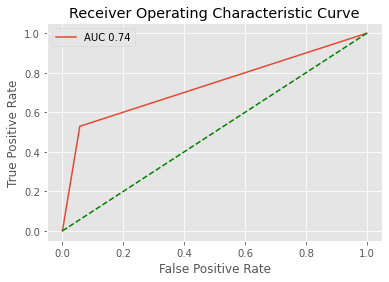

In [64]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
probs = predictor.predict(test_data, model='WeightedEnsemble_L2')
prob = probs.iloc[:]
fper, tper, thresholds = roc_curve(test_data['Quote_Flag'], prob)
auc=roc_auc_score(test_data['Quote_Flag'], prob)
plot_roc_curve(fper, tper, auc)

In [66]:
auc=roc_auc_score(test_data['Quote_Flag'], prob)
auc

0.7360566978656892

In [8]:
importce_ag=predictor.feature_importance(test_data)

These features in provided data are not utilized by the predictor and will be ignored: ['Property_info2']
Computing feature importance via permutation shuffling for 28 features using 5000 rows with 5 shuffle sets...
	209.51s	= Expected runtime (41.9s per shuffle set)
	103.27s	= Actual runtime (Completed 5 of 5 shuffle sets)


In [27]:
importce_ag.iloc[0:20,0]

Personal_info2      0.148199
Sales_info2         0.069502
Personal_info5      0.021094
Personal_info3      0.015984
Coverage_info1      0.015219
Coverage_info3      0.013862
Quote_Date          0.011538
Sales_info4         0.009341
Field_info1         0.007851
Sales_info1         0.007807
Sales_info3         0.006026
Property_info5      0.005904
Geographic_info1    0.003136
Property_info4      0.003110
Geographic_info2    0.002537
Coverage_info2      0.001777
Field_info3         0.001574
Geographic_info5    0.001474
Property_info3      0.001307
Sales_info5         0.000847
Name: importance, dtype: float64

<AxesSubplot:xlabel='importance'>

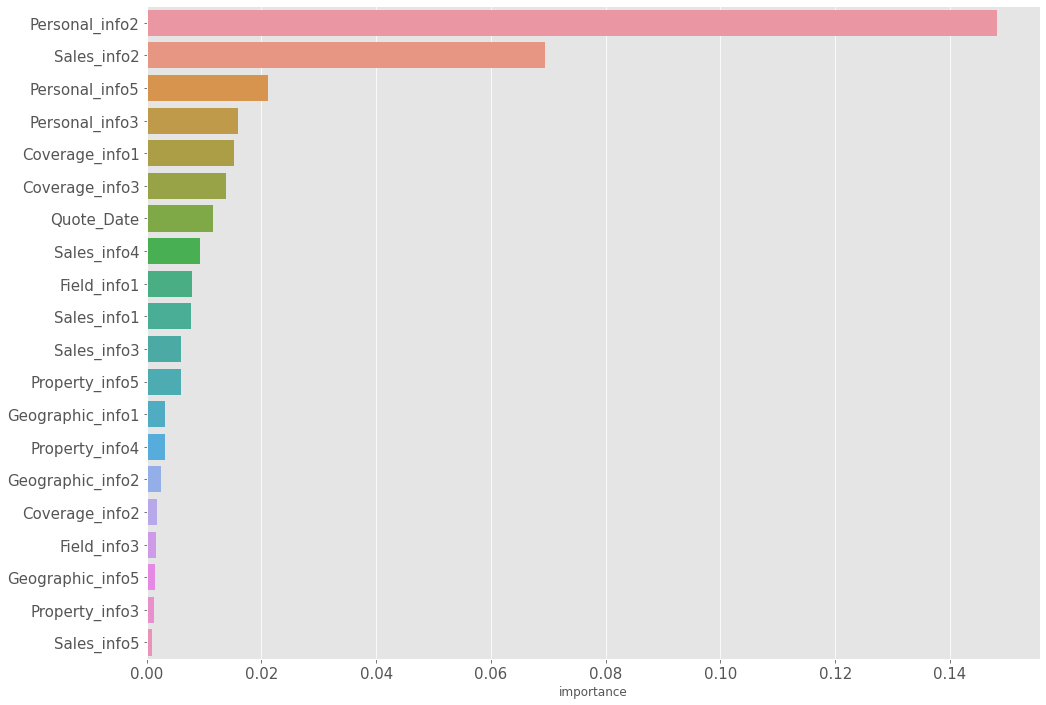

In [37]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rcParams["font.sans-serif"]=["SimHei"]
mpl.rcParams["axes.unicode_minus"]=False
plt.rcParams['font.family']='Time New Roman'
plt.style.use('ggplot')
ax=plt.subplots(figsize=(16,12))#调整画布
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.barplot(x=importce_ag.iloc[0:20,0], y=importce_ag.index[0:20])

In [38]:
df1 = pd.read_csv(r'.\数据集\UnknowData.csv', header=0) 

In [39]:
pd.DataFrame(predictor.predict(df1, model='XGBoost')).to_csv(r'D:/temp/submit_results.csv')